# Title

## Download data

In [6]:
import pandas as pd
import numpy as np
import xarray as xr
import hvplot.xarray
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10,10)
import fsspec
import gdrivefs

In [ ]:
! pip install fsspec==0.8.4
! pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

In [2]:
gdfid = '1hzH32KcsdMtNX0f9_WkMTCyf20tj6ZLk'
gdfs = gdrivefs.GoogleDriveFileSystem(root_file_id = gdfid, token = 'browser')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=yTKshnDILfHmNXERwVybdnXkwpymtp&prompt=consent&access_type=offline


Enter the authorization code:  4/1AY0e-g5SJN4oq9oufsk0HkHqVgxSF_EtC7aV_qqAgbUaWtyaBM9rCorKPfM


In [6]:
files = gdfs.ls('/')
files

['ICE.2000-2010.zarr',
 'ICE.2000.01-12.c41.nc',
 'ICE.2001.01-12.c42.nc',
 'ICE.2002.01-12.c43.nc',
 'ICE.2003.01-12.c44.nc',
 'ICE.2004.01-12.c45.nc',
 'ICE.2005.01-12.c46.nc',
 'ICE.2006.01-12.c47.nc',
 'ICE.2007.01-12.c48.nc',
 'ICE.2008.01-12.c49.nc',
 'ICE.2009.01-12.c50.nc',
 'ICE.2010.01-12.c51.nc']

In [7]:
ofs = []
for file in files[1:]: # only include NetCDF files in files
    ofs.append(gdfs.open(file))

ds = xr.open_mfdataset(ofs)
ds

<xarray.Dataset>
Dimensions:         (ATMLAY: 3, ATMLAY3_3: 1, OUTLAY: 18, OUTLAY1_1: 1, PLEV: 7, SECTOR: 2, SECTOR1_1: 1, TIME: 4018, X12_84: 73, Y21_155: 135, ZTQLEV: 4, ZUVLEV: 3, bnds: 2)
Coordinates:
  * ZTQLEV          (ZTQLEV) float32 2.0 10.0 50.0 100.0
  * X12_84          (X12_84) float32 -760.0 -740.0 -720.0 ... 640.0 660.0 680.0
  * OUTLAY1_1       (OUTLAY1_1) float32 0.0
  * PLEV            (PLEV) float32 200.0 500.0 600.0 700.0 800.0 850.0 925.0
  * ATMLAY          (ATMLAY) float32 0.99899215 0.99937004 0.99974793
  * SECTOR          (SECTOR) float32 1.0 2.0
  * Y21_155         (Y21_155) float32 -1180.0 -1160.0 -1140.0 ... 1480.0 1500.0
  * ZUVLEV          (ZUVLEV) float32 10.0 50.0 100.0
  * ATMLAY3_3       (ATMLAY3_3) float32 0.99974793
  * OUTLAY          (OUTLAY) float32 0.0 0.05 0.1 0.2 0.3 ... 7.5 10.0 15.0 20.0
  * SECTOR1_1       (SECTOR1_1) float32 1.0
  * TIME            (TIME) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds       (TIME, bnds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    DATE            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    YYYY            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MM              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    DD              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    HH              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MIN             (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    LON             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    LAT             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SH              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SRF             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SOL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SLO             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    CZ              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SAL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    VEG             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    MSK             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    FRV             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    FRA             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SHSN0           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN2           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN3           (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ZN4             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN5             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN6             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SMB             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SU              (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ME              (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    RZ              (

### Test  Zarr coding process with tutorial data set

In [30]:
gdfid_tutorial = '162zJ0ZyHaq9dkU4h3MdiZu1Vma8rPxkQ'
gdfs_tutorial = gdrivefs.GoogleDriveFileSystem(root_file_id = gdfid_tutorial, token = 'cache')

In [31]:
mapper_tutorial = gdfs_tutorial.get_mapper('air_temperature.zarr')

In [6]:
ds_tutorial = xr.tutorial.open_dataset("air_temperature")

In [7]:
ds_tutorial.to_zarr(mapper_tutorial)

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/dataset.py:1658: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  append_dim=append_dim,


In [32]:
ds_tut_test = xr.open_zarr(mapper_tutorial)

In [33]:
ds_tut_test

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(730, 13, 27), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...
    title:        4x daily NMC reanalysis (1948)

In [35]:
ds_tut_test.air[0,0,0].load()

<xarray.DataArray 'air' ()>
array(241.2, dtype=float32)
Coordinates:
    lat      float32 75.0
    lon      float32 200.0
    time     datetime64[ns] 2013-01-01
Attributes:
    GRIB_id:       11
    GRIB_name:     TMP
    actual_range:  [185.16000366210938, 322.1000061035156]
    dataset:       NMC Reanalysis
    level_desc:    Surface
    long_name:     4xDaily Air temperature at sigma level 995
    parent_stat:   Other
    precision:     2
    statistic:     Individual Obs
    units:         degK
    var_desc:      Air temperature

Rechunking

In [11]:
ds = ds.chunk({'TIME': 1})

Create mapper

In [7]:
mapper = gdfs.get_mapper('ICE.2000-2010.zarr')

Save data to Zarr file on Google Drive

In [ ]:
ds.to_zarr(mapper)

Open data from Zarr file from Google Drive

In [8]:
# ds = xr.open_zarr(mapper, drop_variables={'AG', 'AG1', 'AL', 'AL1', 'COD', 'CP', 'CWP', 'CZ', 'FRA', 'FRV', 'G11', 'G21', 'IWP', 'LHF', 'LWD', 'LWU', 'ME', 'QI', 'QQ', 'QQP', 'QQZ', 'QR', 'QS', 'QW', 'RF', 'RH', 'RU2', 'RZ', 'SAL', 'SF', 'SHF', 'SHSN0', 'SHSN3', 'SLO', 'SMB', 'SOL', 'SP', 'SF', 'SRF', 'ST', 'ST2', 'SU', 'SW', 'SWD' 'TI1', 'TT', 'TTMAX', 'TTMIN', 'TTP', 'TTZ', 'UU', 'UUP', 'UUZ', 'UV', 'UVZ', 'VEG', 'VV', 'VVP', 'VVZ', 'WA1', 'WVP', 'ZN4', 'ZN5', 'ZN6', 'ZZ', 'ZZP'})
ds_test = xr.open_zarr(mapper, consolidated=True, decode_times=False, decode_coords=False)

KeyError: '.zmetadata'

In [ ]:
ds

# Dataprocessing

#### Only include cells where the ice fraction is larger than 50%

In [21]:
ds_MSK = ds.where(ds.MSK >= 50)
lat = ds.LAT[0,:,:]
lon = ds.LON[0,:,:]

#### Only include Greenland ice sheet, not Canada

In [22]:
blobs = ds.MSK[0,:,:] > 50
all_labels = measure.label(blobs)
GrIS_label = all_labels * 1.0
GrIS_label[GrIS_label == 0] = np.nan
GrIS_label[GrIS_label > 1] = np.nan

#### Define extent for map plots

In [23]:
extent = [-55,-25,58,84]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#### Plot ice sheet area

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


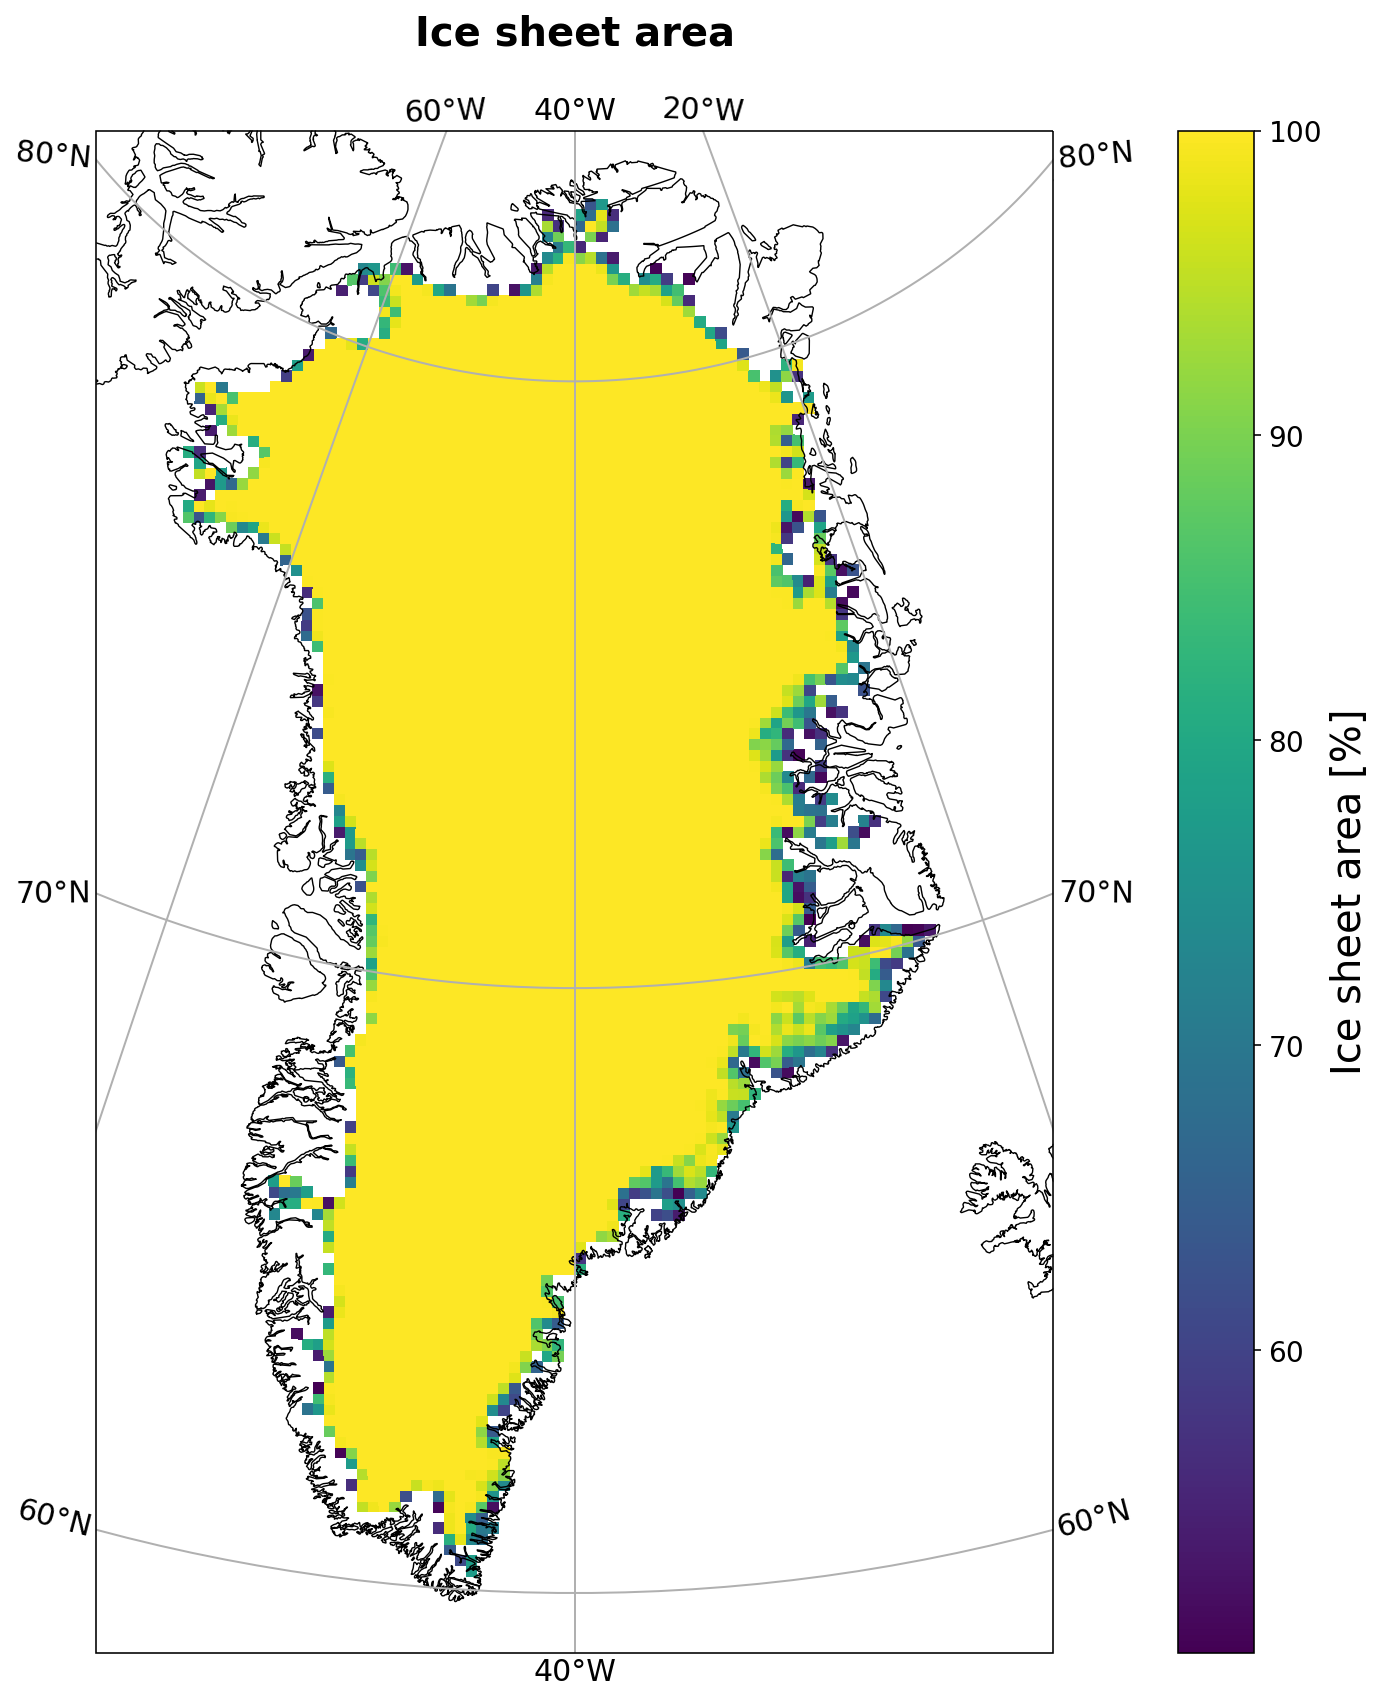

In [24]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, ds_MSK.MSK[0,:,:] * GrIS_label, transform=ccrs.PlateCarree())
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Ice sheet area [%]', fontsize=20)
cbar.ax.tick_params(labelsize=14)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Ice sheet area', weight='bold', fontsize=20, pad=25);

#### Create array with ablation zone height threshold. Ablation zone is below 1624m

In [25]:
SH = ds_MSK.SH[0,:,:]
SH = np.where(SH > 1624, 0, SH)
SH = np.where(SH != 0, 1, SH)

#### Determine cells without snow and density between 920 and 925 kg/m3

In [13]:
SHSN2 = (ds_MSK.SHSN2[:,0,:,:] * GrIS_label)
SHSN2 = np.where(SHSN2 == 0, -1, SHSN2)
SHSN2 = np.where(SHSN2 > -1, 0, SHSN2)
SHSN2 = np.where(SHSN2 == -1, 1, SHSN2)
SHSN2_SH = SHSN2 * SH

In [14]:
RO1 = (ds_MSK.RO1[:,0,:,:] * GrIS_label)
RO1 = np.where((RO1 < 920) & (RO1 > 925), 0, RO1)
RO1 = np.where(RO1 != 0, 1, RO1)
RO1_SH = RO1 * SH

In [27]:
s = SHSN2_SH * RO1_SH

#### Create time slices for each year

In [16]:
t2000 = np.arange(0,366); t2001 = np.arange(366,731); t2002 = np.arange(731,1096); t2003 = np.arange(1096,1461); t2004 = np.arange(1461,1827); t2005 = np.arange(1827,2192);
t2006 = np.arange(2192,2557) ; t2007 = np.arange(2557,2922); t2008 = np.arange(2922,3288); t2009 = np.arange(3288,3653); t2010 = np.arange(3653,4018)
yearlist = np.array([0,366,731,1096,1461,1827,2192,2557,2922,3288,3653,4018])

#### Determine annual maximum bare ice extent

In [139]:
bi = np.zeros((11,ds_MSK.MSK.shape[1], ds_MSK.MSK.shape[2]))
for year in range(11):
    bi[year,:,:] = np.nansum(s[yearlist[year:year+1],:,:])

(11, 135, 73)

In [18]:
yearlist[0:2]

array([  0, 366])

In [19]:
ds_MSK.TIME[366]

<xarray.DataArray 'TIME' ()>
array('2001-01-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    TIME     datetime64[ns] 2001-01-01T12:00:00
Attributes:
    long_name:      time
    axis:           T
    standard_name:  time
    bounds:         TIME_bnds

# Annual means

In [27]:
ds_CC_am = (ds_MSK.CC * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_am = (ds_MSK.CU * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_am = (ds_MSK.CM * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_am = (ds_MSK.CD * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

<Figure size 1152x576 with 0 Axes>

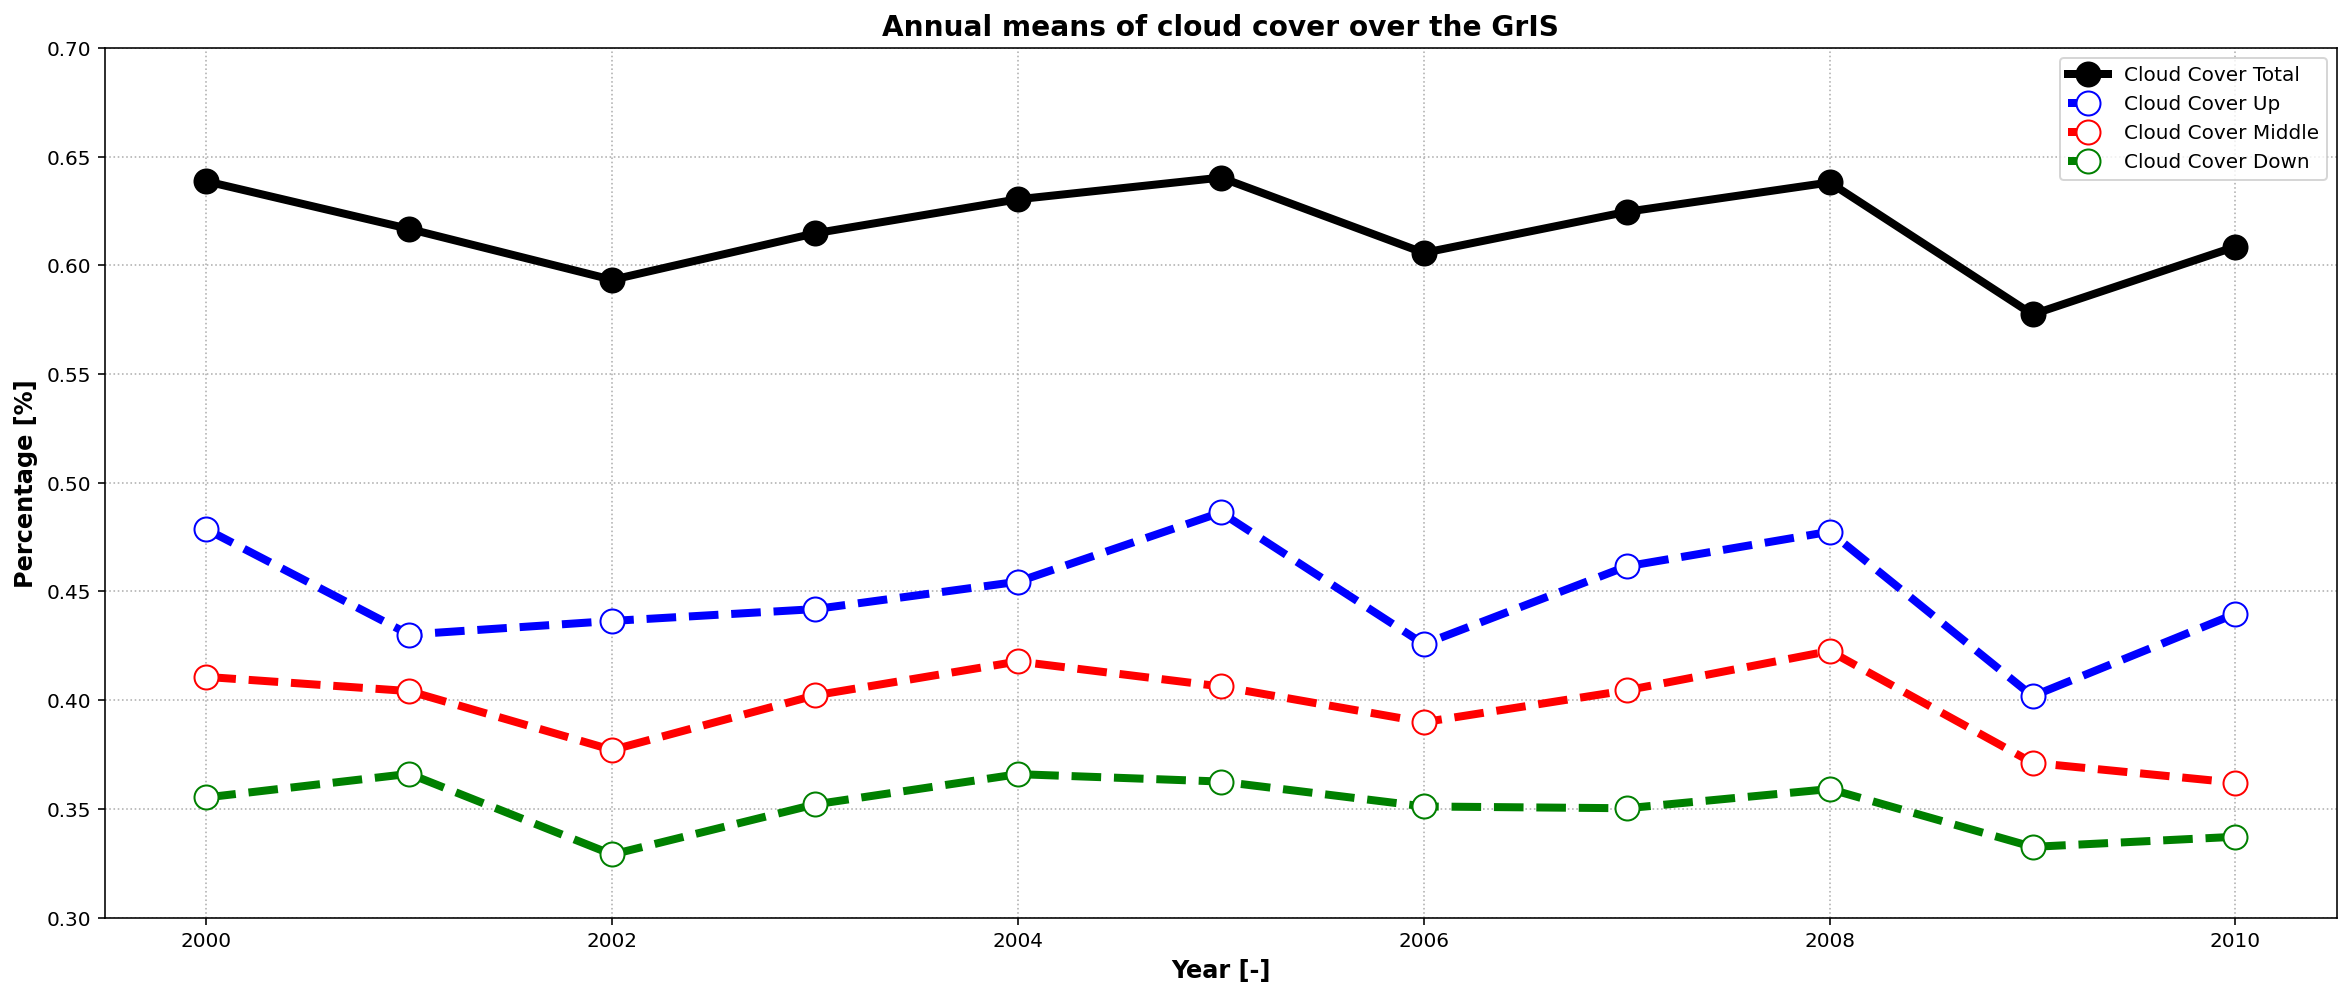

In [39]:
fig = plt.figure(figsize=(20,8))

plt.plot(np.arange(2000,2011), ds_CC_am, marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4, label='Cloud Cover Total')
plt.plot(np.arange(2000,2011), ds_CU_am, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up')
plt.plot(np.arange(2000,2011), ds_CM_am, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle')
plt.plot(np.arange(2000,2011), ds_CD_am, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='green', linewidth=4, label='Cloud Cover Down')
plt.xlim([1999.5, 2010.5])
plt.ylim([0.3, 0.7])
plt.xlabel('Year [-]', weight='bold', fontsize=12)
plt.ylabel('Percentage [%]', weight='bold', fontsize=12)
plt.title('Annual means of cloud cover over the GrIS', weight='bold', fontsize=14)
plt.legend(loc='upper right')
plt.grid(linestyle=':')

In [ ]:
ds_MSK.CC.groupby('TIME.day').mean(dim=['TIME','Y21_155', 'X12_84']).hvplot()


In [ ]:
# subplots of upper, middle, lower cloud content

ds_MSK.CU.mean(dim='TIME').plot();

In [ ]:
ds.AL2[:,0,:,:].mean(dim='TIME').plot();